In [2]:
import pandas as  pd
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
df_origin = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Travel mode determination\origin_info_of_valid_IDs.csv')

In [121]:
df_activites = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Activity_type_travel_mode_25082024_final_dataframe.csv')

In [122]:
df_activites.shape

(2792457, 16)

In [123]:
df_activites['place_name'].nunique()

247

In [124]:
IDs = df_activites['maid'].unique().tolist()

In [125]:
df_origin = df_origin[df_origin['maid'].isin(set(IDs))]

In [22]:
state_to_UK_OD = df_origin.groupby('state')['maid'].count().reset_index()

# Rename columns for clarity
state_to_UK_OD.columns = ['State', 'Number of MAIDs']

# Display the result
print(state_to_UK_OD)

                State  Number of MAIDs
0      Andhra Pradesh               10
1   Arunachal Pradesh                1
2               Assam                7
3               Bihar               45
4          Chandigarh                5
5        Chhattisgarh               17
6               Delhi             1000
7                 Goa                2
8             Gujarat               79
9             Haryana              134
10   Himachal Pradesh               34
11    JAMMU & KASHMIR               22
12  Jammu and Kashmir                2
13          Jharkhand               10
14          Karnataka               28
15             Kerala                5
16             Ladakh                4
17     Madhya Pradesh               64
18        Maharashtra              184
19           Nagaland                1
20             Odisha               16
21             Punjab               69
22          Rajasthan               82
23         Tamil Nadu                6
24          Telangana    

In [23]:
state_to_UK_OD.to_excel(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices\State_to_UK.xlsx', index=False)

In [32]:
# df_origin.rename(columns = {'state':'origin_state', 'district': 'origin_district'}, inplace=True)
df_origin.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'origin_state',
       'origin_district'],
      dtype='object')

In [27]:
df_activites.shape

(2792457, 14)

In [126]:
df_merged = pd.merge(df_activites, df_origin[['maid', 'origin_state', 'origin_district']],how='left', on = ['maid'] )
df_merged.shape

(2792457, 18)

In [127]:
df_merged.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left',
       'place_name', 'Activity_trace', 'date', 'Activity_type', 'Travel_mode',
       'origin_state', 'origin_district'],
      dtype='object')

In [42]:
import pandas as pd

# Sample DataFrame
# df_merged = pd.DataFrame({'state': [...], 'district': [...], 'origin_state': [...], 'origin_district': [...], 
#                           'maid': [...], 'datetime': [...], 'latitude': [...], 'longitude': [...], ...})

# Step 1: Sort the DataFrame
df_sorted = df_merged.sort_values(by=['maid', 'datetime', 'latitude', 'longitude'])

# Step 2: Exclude records where 'origin_state' is 'Uttarakhand'
df_filtered = df_sorted[df_sorted['origin_state'] != 'Uttarakhand']

# Step 3: Determine the first district for each 'maid'
# Group by 'maid' and get the first occurrence of 'district' in the sorted DataFrame
first_district_per_maid = df_filtered.groupby('maid').first().reset_index()
first_district_per_maid = first_district_per_maid[['maid', 'origin_state', 'district']]

# Step 4: Create the OD matrix
# Group by 'origin_state' and 'district', and count occurrences
od_matrix = first_district_per_maid.groupby(['origin_state', 'district']).size().reset_index(name='count')

# Pivot the table to have 'origin_state' as rows and 'district' as columns
od_matrix_pivot = od_matrix.pivot(index='origin_state', columns='district', values='count').fillna(0)

# Display the OD matrix
# print(od_matrix_pivot)
od_matrix_pivot


district           Almora  Bageshwar  Chamoli  Champawat  Dehradun  Haridwar  \
origin_state                                                                   
Andhra Pradesh        1.0        0.0      0.0        0.0       2.0       3.0   
Arunachal Pradesh     0.0        0.0      0.0        0.0       0.0       1.0   
Assam                 0.0        0.0      0.0        0.0       3.0       2.0   
Bihar                 0.0        0.0      0.0        0.0      13.0      23.0   
Chandigarh            1.0        0.0      0.0        0.0       2.0       0.0   
Chhattisgarh          0.0        0.0      0.0        0.0       2.0      13.0   
Delhi                24.0        8.0     17.0       15.0     276.0     216.0   
Goa                   0.0        0.0      0.0        0.0       1.0       1.0   
Gujarat               0.0        0.0      1.0        0.0      22.0      46.0   
Haryana               1.0        0.0      2.0        0.0      42.0      45.0   
Himachal Pradesh      0.0        0.0      0.0        0.0      26.0       4.0   
JAMMU & KASHMIR       1.0        0.0      0.0        0.0       4.0       6.0   
Jammu and Kashmir     0.0        0.0      0.0        0.0       2.0       0.0   
Jharkhand             0.0        0.0      0.0        0.0       2.0       7.0   
Karnataka             0.0        0.0      0.0        0.0       9.0       7.0   
Kerala                0.0        0.0      0.0        0.0       1.0       2.0   
Ladakh                0.0        0.0      0.0        1.0       2.0       0.0   
Madhya Pradesh        0.0        0.0      1.0        1.0      10.0      42.0   
Maharashtra           5.0        0.0      1.0        2.0      41.0      85.0   
Nagaland              0.0        0.0      0.0        0.0       1.0       0.0   
Odisha                0.0        0.0      0.0        0.0       0.0      13.0   
Punjab                0.0        0.0      1.0        0.0      21.0      26.0   
Rajasthan             0.0        0.0      1.0        0.0      16.0      36.0   
Tamil Nadu            0.0        0.0      0.0        0.0       0.0       4.0   
Telangana             2.0        3.0      0.0        1.0       6.0       7.0   
Uttar Pradesh         8.0        1.0      4.0        9.0     170.0     295.0   
West Bengal           0.0        0.0      0.0        0.0       2.0      26.0   

district           Nainital  Pauri Garhwal  Pithoragarh  Rudraprayag  \
origin_state                                                           
Andhra Pradesh          1.0            0.0          1.0          0.0   
Arunachal Pradesh       0.0            0.0          0.0          0.0   
Assam                   0.0            1.0          0.0          1.0   
Bihar                   1.0            2.0          0.0          1.0   
Chandigarh              0.0            1.0          0.0          0.0   
Chhattisgarh            1.0            0.0          0.0          1.0   
Delhi                 117.0           45.0         20.0         12.0   
Goa                     0.0            0.0          0.0          0.0   
Gujarat                 4.0            1.0          0.0          0.0   
Haryana                12.0            5.0          1.0          0.0   
Himachal Pradesh        0.0            0.0          0.0          0.0   
JAMMU & KASHMIR         3.0            1.0          0.0          0.0   
Jammu and Kashmir       0.0            0.0          0.0          0.0   
Jharkhand               0.0            0.0          0.0          0.0   
Karnataka               7.0            0.0          0.0          0.0   
Kerala                  1.0            1.0          0.0          0.0   
Ladakh                  1.0            0.0          0.0          0.0   
Madhya Pradesh          4.0            1.0          0.0          0.0   
Maharashtra            21.0            6.0          3.0          0.0   
Nagaland                0.0            0.0          0.0          0.0   
Odisha                  1.0            0.0          0.0          0.0   
Punjab                 

In [44]:
od_matrix_pivot.to_excel(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices\State_to_UK_districts.xlsx')

In [47]:
# Ensure the 'datetime' column is in datetime format
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

# Extract the date part from the datetime
df_merged['date'] = df_merged['datetime'].dt.date

# Function to generate and save OD matrices on a per-day basis
def create_daily_state_UK_districts_od_matrices(df, file_path):
    # Exclude records where 'origin_state' is 'Uttarakhand'
    df_filtered = df[df['origin_state'] != 'Uttarakhand']
    
    # Initialize an Excel writer
    with pd.ExcelWriter(file_path) as writer:
        # Iterate through each unique date in the DataFrame
        for date, group in df_filtered.groupby('date'):
            # Determine the first district for each 'maid' for the given day
            first_district_per_maid = group.groupby('maid').first().reset_index()
            first_district_per_maid = first_district_per_maid[['maid', 'origin_state', 'district']]
            
            # Create the OD matrix for the current day
            od_matrix = first_district_per_maid.groupby(['origin_state', 'district']).size().reset_index(name='count')
            od_matrix_pivot = od_matrix.pivot(index='origin_state', columns='district', values='count').fillna(0)
            
            # Write the OD matrix to a new sheet in the Excel file
            sheet_name = date.strftime('%Y-%m-%d')  # Convert date to string format for sheet name
            od_matrix_pivot.to_excel(writer, sheet_name=sheet_name)
    
    print(f"OD matrices have been saved to {file_path}")

# Specify the path where the Excel file should be saved
file_path = r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices/State_to_UK_district_od_datewise.xlsx'  

# Call the function to create and save OD matrices
create_daily_state_UK_districts_od_matrices(df_merged, file_path)


OD matrices have been saved to C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices/State_to_UK_district_od_datewise.xlsx


In [48]:
import pandas as pd

# Sort the DataFrame by 'maid' and 'datetime' to maintain correct order of movements
df_merged = df_merged.sort_values(by=['maid', 'datetime'])

# Shift the 'district' column to find the next district for each maid
df_merged['next_district'] = df_merged.groupby('maid')['district'].shift(-1)

# Filter out rows where 'district' is the same as 'next_district' or where 'next_district' is NaN
df_trips = df_merged[df_merged['district'] != df_merged['next_district']].dropna(subset=['next_district'])

# Group by 'district' and 'next_district' to count trips from each district to the next
district_od_counts = df_trips.groupby(['district', 'next_district']).size().reset_index(name='count')

# Pivot the DataFrame to create the OD matrix
district_od_matrix = district_od_counts.pivot(index='district', columns='next_district', values='count').fillna(0)

# Display the OD matrix
# print(district_od_matrix)
district_od_matrix


next_district      Almora  Bageshwar  Chamoli  Champawat  Dehradun  Haridwar  \
district                                                                       
Almora                0.0      180.0     70.0      126.0      40.0      21.0   
Bageshwar           178.0        0.0    102.0        3.0       8.0       1.0   
Chamoli              69.0       98.0      0.0        0.0      64.0      87.0   
Champawat           132.0        2.0      0.0        0.0       7.0      14.0   
Dehradun             36.0        8.0     46.0        8.0       0.0    4636.0   
Haridwar             22.0        2.0     71.0       19.0    4731.0       0.0   
Nainital           1053.0       70.0    145.0      136.0    1278.0    1859.0   
Pauri Garhwal        90.0        1.0     81.0        0.0    2044.0     469.0   
Pithoragarh         102.0       79.0      1.0      157.0      14.0       9.0   
Rudraprayag           3.0        4.0    637.0        0.0      86.0      47.0   
Tehri Garhwal         6.0        0.0     44.0        0.0    2756.0     365.0   
Udham Singh Nagar    73.0        4.0      5.0      419.0     314.0     355.0   
Uttarkashi            6.0        0.0      5.0        0.0     259.0      35.0   

next_district      Nainital  Pauri Garhwal  Pithoragarh  Rudraprayag  \
district                                                               
Almora               1051.0           97.0         87.0          5.0   
Bageshwar              68.0            1.0         83.0          3.0   
Chamoli               153.0          117.0          0.0        519.0   
Champawat             152.0            0.0        158.0          0.0   
Dehradun             1249.0         2017.0         12.0         66.0   
Haridwar             1895.0          464.0          8.0         35.0   
Nainital                0.0          289.0        154.0         55.0   
Pauri Garhwal         295.0            0.0          1.0        282.0   
Pithoragarh           150.0            0.0          0.0          0.0   
Rudraprayag            54.0          270.0          0.0          0.0   
Tehri Garhwal          71.0         1912.0          1.0        303.0   
Udham Singh Nagar    5497.0           38.0         14.0          0.0   
Uttarkashi             49.0            4.0          0.0         31.0   

next_district      Tehri Garhwal  Udham Singh Nagar  Uttarkashi  
district                                                         
Almora                       5.0               75.0         6.0  
Bageshwar                    2.0                4.0         0.0  
Chamoli                     97.0                4.0         1.0  
Champawat                    0.0              411.0         0.0  
Dehradun                  2857.0              313.0       316.0  
Haridwar                   300.0              340.0        49.0  
Nainital                    68.0             5485.0        50.0  
Pauri Garhwal             1913.0               34.0         5.0  
Pithoragarh                  0.0               16.0         0.0  
Rudraprayag                173.0                3.0         6.0  
Tehri Garhwal                0.0                7.0       313.0  
Udham Singh Nagar            7.0                0.0         2.0  
Uttarkashi                 367.0                1.0         0.0

In [49]:
district_od_matrix.to_excel(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices\district_OD_matrix_trips.xlsx')

In [53]:
import pandas as pd

def create_district_od_matrix_datewise(df, output_path):
    """
    Creates a date-wise district-to-district OD matrix and saves it in an Excel file.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'maid', 'district', and 'datetime' columns.
    output_path (str): Path where the Excel file will be saved.
    """
    # Ensure 'datetime' is in datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Sort DataFrame by 'maid' and 'datetime'
    df.sort_values(by=['maid', 'datetime'], inplace=True)

    # Extract the date from 'datetime'
    df['date'] = df['datetime'].dt.date

    # Initialize an Excel writer
    writer = pd.ExcelWriter(output_path, engine='xlsxwriter')

    # Group by date
    for date, group in df.groupby('date'):
        # Shift the 'district' column to find the next district for each maid
        group['next_district'] = group.groupby('maid')['district'].shift(-1)
        
        # Filter out rows where 'district' is the same as 'next_district' or where 'next_district' is NaN
        df_trips = group[group['district'] != group['next_district']].dropna(subset=['next_district'])
        
        # Group by 'district' and 'next_district' to count trips from each district to the next
        od_counts = df_trips.groupby(['district', 'next_district']).size().reset_index(name='count')
        
        # Pivot the DataFrame to create the OD matrix
        od_matrix = od_counts.pivot(index='district', columns='next_district', values='count').fillna(0)
        
        # Write each OD matrix to a separate sheet named after the date
        od_matrix.to_excel(writer, sheet_name=str(date))

    # # Save the Excel file
    writer.close()
    print(f"Excel file saved at {output_path}")

# Example usage:
output_path = r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices\district_od_matrix_trips_datewise.xlsx'
create_district_od_matrix_datewise(df_merged, output_path)


Excel file saved at C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\OD_matrices\district_od_matrix_trips_datewise.xlsx


In [57]:
# Group by 'place_name' and calculate the number of unique 'maid' values
place_name_counts = df_merged.groupby('place_name')['maid'].nunique().reset_index()

# Rename the column to indicate the count of unique 'maid' per 'place_name'
place_name_counts.rename(columns={'maid': 'unique_maids_count'}, inplace=True)

# Sort the DataFrame by the 'unique_maids_count' in descending order
place_name_counts_sorted = place_name_counts.sort_values(by='unique_maids_count', ascending=False)

# Display the sorted DataFrame
# print(place_name_counts_sorted)


In [58]:
pd.set_option('display.max_rows', 260)

In [66]:
place_name_counts_sorted.to_excel(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\place_name_maid_counts_sorted.xlsx', index=False)

In [68]:
place_name_counts_sorted[(place_name_counts_sorted['unique_maids_count']<30)& (place_name_counts_sorted['unique_maids_count']>10)]

place_name  unique_maids_count
114                                             NH107B                  28
179                                              SH 18                  28
137                                              NH707                  27
80                               Joshimath - Auli road                  27
62                                        Har Ki Pauri                  27
210                                       Shiva Statue                  26
109                                            NH 109E                  26
197                                              SH-14                  26
116                                             NH109D                  25
3                                                Aarti                  22
68                                         Hotel Royal                  21
122                                               NH30                  19
55                    Govind Pashu Vihar National Park                  17
111                                              NH 34                  17
97                                               MDR2W                  16
188                                              SH 54                  15
203                                               SH57                  14
66   Himalayan Arogya Niketan Ayurveda Naturopathy ...                  14
83                                     Kalyan Hospital                  14
98                                              MDR65W                  13
33                              Dr. BR Ambedkar Statue                  13
10                                          Bada Bazar                  13
75             Jagdamba Heat Care and Maternity Centre                  12
24                        Deen Dayal Upadhyay hospital                  12
32                                  Dr. Arora's Clinic                  12
1                          AIIMS Blood Bank, Rishikesh                  12
175                                              SH 11                  11
110                                             NH 334                  11
36                          Dr. Nirmal Chandra Mungali                  11
208                                        Sehetrdhara                  11

In [86]:
df_merged['district'].unique()

array(['Udham Singh Nagar', 'Haridwar', 'Nainital', 'Pithoragarh',
       'Dehradun', 'Chamoli', 'Pauri Garhwal', 'Tehri Garhwal',
       'Bageshwar', 'Almora', 'Rudraprayag', 'Champawat', 'Uttarkashi'],
      dtype=object)

In [5]:
import pandas as pd

# Define the mapping of full state names to short names
state_short_names = {
    'Uttarakhand': 'UK',
    'Uttar Pradesh': 'UP',
    'Karnataka': 'KA',
    'JAMMU & KASHMIR': 'JK',
    'Himachal Pradesh': 'HP',
    'Maharashtra': 'MH',
    'Delhi': 'DL',
    'West Bengal': 'WB',
    'Rajasthan': 'RJ',
    'Haryana': 'HR',
    'Bihar': 'BR',
    'Madhya Pradesh': 'MP',
    'Gujarat': 'GJ',
    'Punjab': 'PB',
    'Chandigarh': 'CH',
    'Jharkhand': 'JH',
    'Ladakh': 'LD',
    'Kerala': 'KL',
    'Chhattisgarh': 'CG',
    'Andhra Pradesh': 'AP',
    'Telangana': 'TG',
    'Assam': 'AS',
    'Tamil Nadu': 'TN',
    'Goa': 'GA',
    'Odisha': 'OD',
    'Nagaland': 'NL',
    'Jammu and Kashmir': 'JK',
    'Arunachal Pradesh': 'AR'
}

# Create the 'origin_state_short' column in df_merged and update it
df_trajectory_2['origin_state_short'] = df_trajectory_2['origin_state'].map(state_short_names)

# Print the updated DataFrame to verify
# print(df_merged.head())


In [129]:
import pandas as pd

# Define the mapping of district names to short names
district_short_names = {
    'Udham Singh Nagar': 'USN',
    'Haridwar': 'HRD',
    'Nainital': 'NTL',
    'Pithoragarh': 'PTH',
    'Dehradun': 'DDR',
    'Chamoli': 'CHM',
    'Pauri Garhwal': 'PGW',
    'Tehri Garhwal': 'TGW',
    'Bageshwar': 'BGS',
    'Almora': 'ALM',
    'Rudraprayag': 'RPG',
    'Champawat': 'CPW',
    'Uttarkashi': 'UTK'
}

# Create the 'district_short_name' column in df_merged and update it
df_merged['district_short_name'] = df_merged['district'].map(district_short_names)

# Print the updated DataFrame to verify
# print(df_merged.head())

#### Plot pie charts fo places

In [120]:
df_merged.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left',
       'place_name', 'Activity_trace', 'date', 'origin_state',
       'origin_district', 'next_district', 'origin_state_short',
       'district_short_name'],
      dtype='object')

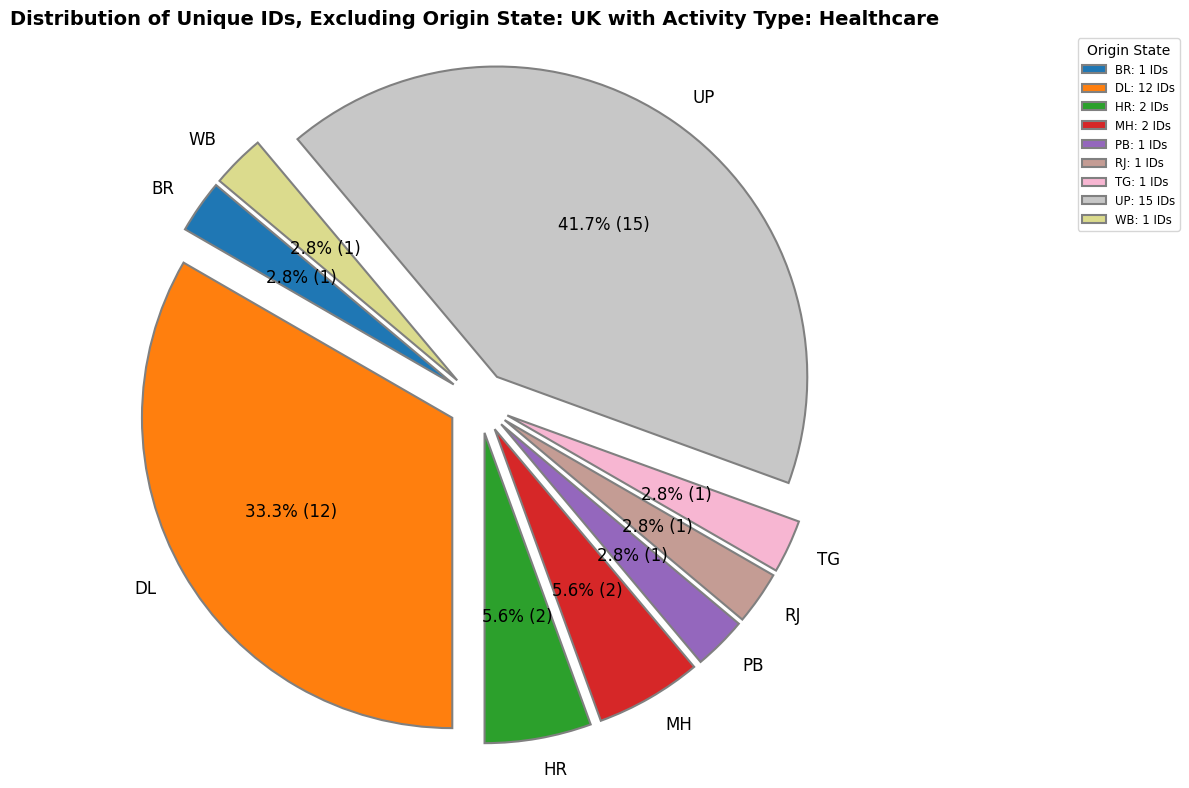

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_pie_chart(df, place_name=None, district=None, origin_district=None, origin_state=None, activity_type=None, travel_mode=None):
    # Initialize the DataFrame to be filtered
    filtered_df = df
    
    # Filter by place_name if provided
    if place_name:
        if not isinstance(place_name, list):
            place_name = [place_name]
        pattern = '|'.join(place_name)
        filtered_df = filtered_df[filtered_df['place_name'].str.contains(pattern, case=False, na=False)]
    
    # Filter by district if provided
    if district:
        filtered_df = filtered_df[filtered_df['district_short_name'] == district]
    
    # Filter by origin_district if provided
    if origin_district:
        filtered_df = filtered_df[filtered_df['origin_district'] != origin_district]
    
    # Filter by origin_state if provided
    if origin_state:
        filtered_df = filtered_df[filtered_df['origin_state_short'] != origin_state]
    
    # Filter by activity_type if provided
    if activity_type:
        filtered_df = filtered_df[filtered_df['Activity_type'].str.contains(activity_type, case=False, na=False)]
    
    # Filter by travel_mode if provided
    if travel_mode:
        filtered_df = filtered_df[filtered_df['Travel_mode'].str.contains(travel_mode, case=False, na=False)]
    
    # Count the number of unique IDs per origin state
    id_counts_per_state = filtered_df.groupby('origin_state_short')['maid'].nunique()
    
    # Prepare data for pie chart
    labels = id_counts_per_state.index
    sizes = id_counts_per_state.values
    
    # Use a colormap that can handle many distinct colors
    num_colors = len(labels)
    cmap = plt.get_cmap('tab20')  # 'tab20' colormap can handle up to 20 colors
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    explode = [0.1] * len(labels)  # Slightly explode all slices for emphasis
    
    # Create a pie chart
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(sizes, 
                                       labels=labels,
                                       autopct=lambda p: f'{p:.1f}% ({round(p * sum(sizes) / 100)})',
                                       startangle=140,
                                       colors=colors,
                                       explode=explode,
                                       textprops={'fontsize': 12, 'color': 'black'},
                                       wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
    
    # Add a legend with state names and counts
    plt.legend(wedges, [f'{state}: {count} IDs' for state, count in id_counts_per_state.items()], 
               title="Origin State",
               loc="best",
               bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize='small')
    
    # Construct the title based on parameters provided
    title = "Distribution of Unique IDs"
    if place_name:
        title += f" for Place: {', '.join(place_name)}"
    if district:
        title += f" (District: {district})"
    if origin_district:
        title += f", Excluding Origin District: {origin_district}"
    if origin_state:
        title += f", Excluding Origin State: {origin_state}"
    if activity_type:
        title += f" with Activity Type: {activity_type}"
    if travel_mode:
        title += f" with Travel Mode: {travel_mode}"
    
    plt.title(title, fontsize=14, weight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
    plt.show()

# Example usage
plot_pie_chart(df_merged, place_name=None, origin_state='UK', activity_type='Healthcare')


In [111]:
df_merged[(df_merged['Velocity']>150) & (df_merged['displacement']>150)]['maid'].nunique()  # IDs = 626 #count()   #1023

626

### Detrmination of Entrance mode

In [2]:
import pandas as pd

In [133]:
df_outsiders = df_merged[df_merged['origin_state_short']!='UK']

In [7]:
# df_trajectory_2['origin_state'] = df_trajectory_2['origin_state_short']
# df_trajectory_2['district'] = df_trajectory_2['district_short_name']

In [9]:
# df_trajectory_2.drop(columns=['Unnamed: 0','origin_state_short', 'district_short_name'], inplace=True)
df_trajectory_2.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'Nearest airport',
       'Distance to airport (km)', 'origin_state', 'origin_district', 'date',
       'time', 'y', 'x', 'position_group', 'time_group', 'geometry', 'highway',
       'ref_old', 'ref_left', 'distance_to_road(m)', 'name_rail',
       'dist_to_rail(m)', 'name_airport_boundary', 'name_airport_point',
       'dist_to_airport(m)', 'Travelling mode', 'place_name_travel_mode'],
      dtype='object')

In [10]:
# df_trajectory_2 = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\step_7_UK_records_with_travel_modes.csv')
df_trajectory_2.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\step_8_UK_records_with_travel_modes_short_names.csv', index=False)

In [4]:
import pandas as pd

# Define the mapping of district names to short names
district_short_names = {
    'Udham Singh Nagar': 'USN',
    'Haridwar': 'HRD',
    'Nainital': 'NTL',
    'Pithoragarh': 'PTH',
    'Dehradun': 'DDR',
    'Chamoli': 'CHM',
    'Pauri Garhwal': 'PGW',
    'Tehri Garhwal': 'TGW',
    'Bageshwar': 'BGS',
    'Almora': 'ALM',
    'Rudraprayag': 'RPG',
    'Champawat': 'CPW',
    'Uttarkashi': 'UTK'
}

# Create the 'district_short_name' column in df_merged and update it
df_trajectory_2['district_short_name'] = df_trajectory_2['district'].map(district_short_names)

# Print the updated DataFrame to verify
# print(df_merged.head())

In [11]:
df_trajectory_2['origin_state'].unique()

array(['DL', 'UK', 'UP', 'WB', 'KA', 'JK', 'HP', 'MH', 'HR', 'MP', 'CH',
       'RJ', 'PB', 'KL', 'GJ', 'BR', 'TG', 'JH', 'CG', 'NL', nan, 'LD',
       'OD', 'AS', 'TN', 'AP', 'GA', 'AR'], dtype=object)

In [44]:
df_trajectory_2['first_district'] = df_trajectory_2.groupby('maid')['district'].transform('first')

In [46]:
df_trajectory_2[df_trajectory_2['first_district']=='ALM']['maid'].nunique()

1047

In [47]:
outsiders = df_trajectory_2[df_trajectory_2['origin_state']!='UK']['maid'].unique().tolist()
print(len(outsiders))
df_outsiders = df_trajectory_2[df_trajectory_2['maid'].isin(set(outsiders))]
df_outsiders.shape
# print(outsiders)

9780


(1102793, 32)

In [49]:
df_outsiders[(df_outsiders['first_district']=='ALM')& (df_outsiders['Travelling mode'].notna())]['maid'].nunique()

140

In [30]:
df_outsiders['Travelling mode'].unique()

array([nan, 'Road', 'Rail', 'Air'], dtype=object)

In [31]:
import pandas as pd

# Sample df_outsiders (example)
# df_outsiders = pd.DataFrame({
#     'maid': ['A', 'A', 'B', 'B', 'C'],
#     'datetime': ['2024-08-01 08:00:00', '2024-08-01 09:00:00', '2024-08-02 10:00:00', '2024-08-02 11:00:00', '2024-08-03 12:00:00'],
#     'date': ['2024-08-01', '2024-08-01', '2024-08-02', '2024-08-02', '2024-08-03'],
#     'latitude': [29.12, 29.13, 28.67, 28.68, 27.12],
#     'longitude': [79.32, 79.33, 77.12, 77.13, 78.12],
#     'district': ['District1', 'District1', 'District2', 'District2', 'District3'],
#     'place_name': ['Place1', 'Place1', 'Place2', 'Place2', 'Place3'],
#     'travel_mode': ['Train', None, 'Road', 'Road', 'Flight'],
#     'highway': ['Highway1', 'Highway1', 'Highway2', 'Highway2', 'Highway3']
# })

# Step 1: Get the first occurrence of each 'maid'
first_occurrences = df_outsiders.groupby('maid').first().reset_index()

# # Step 2: Filter for rows with a valid 'travel_mode'
# valid_entries = first_occurrences[(first_occurrences['Travel_mode'].notna()) &(first_occurrences['Travel_mode']!='')]

valid_entries = first_occurrences[(first_occurrences['Travelling mode'].notna()) &(first_occurrences['Travelling mode']!='')]

# # Step 3: Create a new DataFrame with the required columns
# df_new = pd.DataFrame(columns=['maid', 'datetime', 'date', 'latitude', 'longitude', 'district', 'place_name', 'entrance_mode', 'highway', 'origin_state_short', 'origin_district'])

# df_new = pd.DataFrame(columns=['maid', 'datetime', 'date', 'latitude', 'longitude', 'district', 'entrance_mode', 'origin_state', 'origin_district', 'ref_left', 'ref_old', 'place_name_travel_mode'])

# # Step 4: Populate the new DataFrame
# df_new['maid'] = valid_entries['maid']
# df_new['datetime'] = valid_entries['datetime']
# df_new['date'] = valid_entries['date']
# df_new['latitude'] = valid_entries['latitude']
# df_new['longitude'] = valid_entries['longitude']
# df_new['district'] = valid_entries['district']
# df_new['place_name'] = valid_entries['place_name']
# df_new['entrance_mode'] = valid_entries['Travel_mode']  # Using 'travel_mode' as 'entrance_mode'
# df_new['highway'] = valid_entries['highway']
# df_new['origin_state_short'] = valid_entries['origin_state_short']
# df_new['origin_district'] = valid_entries['origin_district']

import pandas as pd

# Step 1: Create the new DataFrame with corrected column names
df_new = pd.DataFrame(columns=[
    'maid', 
    'datetime', 
    'date', 
    'latitude', 
    'longitude', 
    'district', 
    'entrance_mode', 
    'origin_state', 
    'origin_district', 
    'ref', 
    'ref_old', 
    'place_name_travel_mode'
])

# Step 2: Populate the new DataFrame
df_new['maid'] = valid_entries['maid']
df_new['datetime'] = valid_entries['datetime']
df_new['date'] = valid_entries['date']
df_new['latitude'] = valid_entries['latitude']
df_new['longitude'] = valid_entries['longitude']
df_new['district'] = valid_entries['district']
df_new['place_name_travel_mode'] = valid_entries['place_name_travel_mode']  # Correcting 'place_name' to 'place_name_travel_mode'
df_new['entrance_mode'] = valid_entries['Travelling mode']  # Correcting 'Travel_mode' to 'Travelling mode'
df_new['origin_state'] = valid_entries['origin_state']  # Correcting 'origin_state_short' to 'origin_state'
df_new['origin_district'] = valid_entries['origin_district']
df_new['ref_left'] = valid_entries['ref_left']
df_new['ref_old'] = valid_entries['ref_old']

# Now df_new should have the correct column names and data.

# Display the new DataFrame
# print(df_new)


In [32]:
df_new['entrance_mode'].value_counts()

entrance_mode
Road    6685
Rail     725
Air      485
Name: count, dtype: int64

In [156]:
first_occurrences['maid'].nunique()

2718

In [34]:
invalid_entrance_IDs = first_occurrences[(first_occurrences['Travelling mode'].isna())]['maid'].unique().tolist()

In [35]:
df_invalid_entrance = df_outsiders[df_outsiders['maid'].isin(set(invalid_entrance_IDs))]

In [163]:
df_invalid_entrance['Activity_type'].unique()

array([nan, 'Place of Worship', 'national_park'], dtype=object)

In [165]:
df_new.columns

Index(['maid', 'datetime', 'date', 'latitude', 'longitude', 'district',
       'place_name', 'entrance_mode', 'highway', 'origin_state_short',
       'origin_district'],
      dtype='object')

In [37]:
df_invalid_entrance.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\Unique_outsiders_with_unknown entrance mode.csv', index=False)

In [39]:
import pandas as pd

# Step 1: Calculate the total number of entries for each entrance mode
total_entries_by_mode = df_new.groupby('entrance_mode').size()

# Step 2: Calculate the number of entries for each entrance mode by district
entries_by_mode_and_district = df_new.groupby(['entrance_mode', 'district']).size().reset_index(name='count')

# Step 3: Calculate the number of entries for each entrance mode by district and origin state
# entries_by_mode_district_and_state = df_new.groupby(['entrance_mode', 'district', 'origin_state_short']).size().reset_index(name='count')

entries_by_mode_district_and_state = df_new.groupby(['entrance_mode', 'district', 'origin_state']).size().reset_index(name='count')

# Merge the district count with the state count to calculate the percentage
merged_df = pd.merge(entries_by_mode_and_district, entries_by_mode_district_and_state, on=['entrance_mode', 'district'], suffixes=('_district', '_state'))

# Calculate the percentage of each state's entries within each district for a given entrance mode
merged_df['percentage_state_in_district'] = (merged_df['count_state'] / merged_df['count_district']) * 100

# Calculate the percentage of each district's entries within each entrance mode
merged_df['percentage_district_in_mode'] = (merged_df['count_district'] / merged_df.groupby('entrance_mode')['count_district'].transform('sum')) * 100

# Display the results
print("Total entries by mode:")
print(total_entries_by_mode)
print("\nEntries by mode and district:")
print(entries_by_mode_and_district)
print("\nEntries by mode, district, and origin state:")
print(entries_by_mode_district_and_state)
print("\nMerged DataFrame with percentages:")
print(merged_df)


Total entries by mode:
entrance_mode
Air      485
Rail     725
Road    6685
dtype: int64

Entries by mode and district:
   entrance_mode district  count
0            Air      ALM      1
1            Air      BGS     25
2            Air      CHM      4
3            Air      CPW      1
4            Air      DDR    131
5            Air      HRD    176
6            Air      NTL     18
7            Air      PGW     18
8            Air      PTH     13
9            Air      RPG     34
10           Air      TGW     53
11           Air      USN      5
12           Air      UTK      6
13          Rail      CHM      1
14          Rail      CPW     13
15          Rail      DDR     95
16          Rail      HRD    413
17          Rail      NTL     88
18          Rail      PGW     11
19          Rail      PTH      1
20          Rail      RPG      3
21          Rail      TGW      4
22          Rail      USN     96
23          Road      ALM    139
24          Road      BGS     30
25          Road      

In [43]:
df_outsiders[df_outsiders['first_district'].notna()]

KeyError: 'first_district'

In [40]:
import os
# Define the folder path
folder_path = r"C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\Entrance_mode_details"

# Ensure the folder exists, if not, create it
os.makedirs(folder_path, exist_ok=True)

# Save each DataFrame as a CSV file
total_entries_by_mode.to_csv(os.path.join(folder_path, "total_entries_by_mode.csv"), index=False)
entries_by_mode_and_district.to_csv(os.path.join(folder_path, "entries_by_mode_and_district.csv"), index=False)
entries_by_mode_district_and_state.to_csv(os.path.join(folder_path, "entries_by_mode_district_and_state.csv"), index=False)
merged_df.to_csv(os.path.join(folder_path, "merged_df.csv"), index=False)

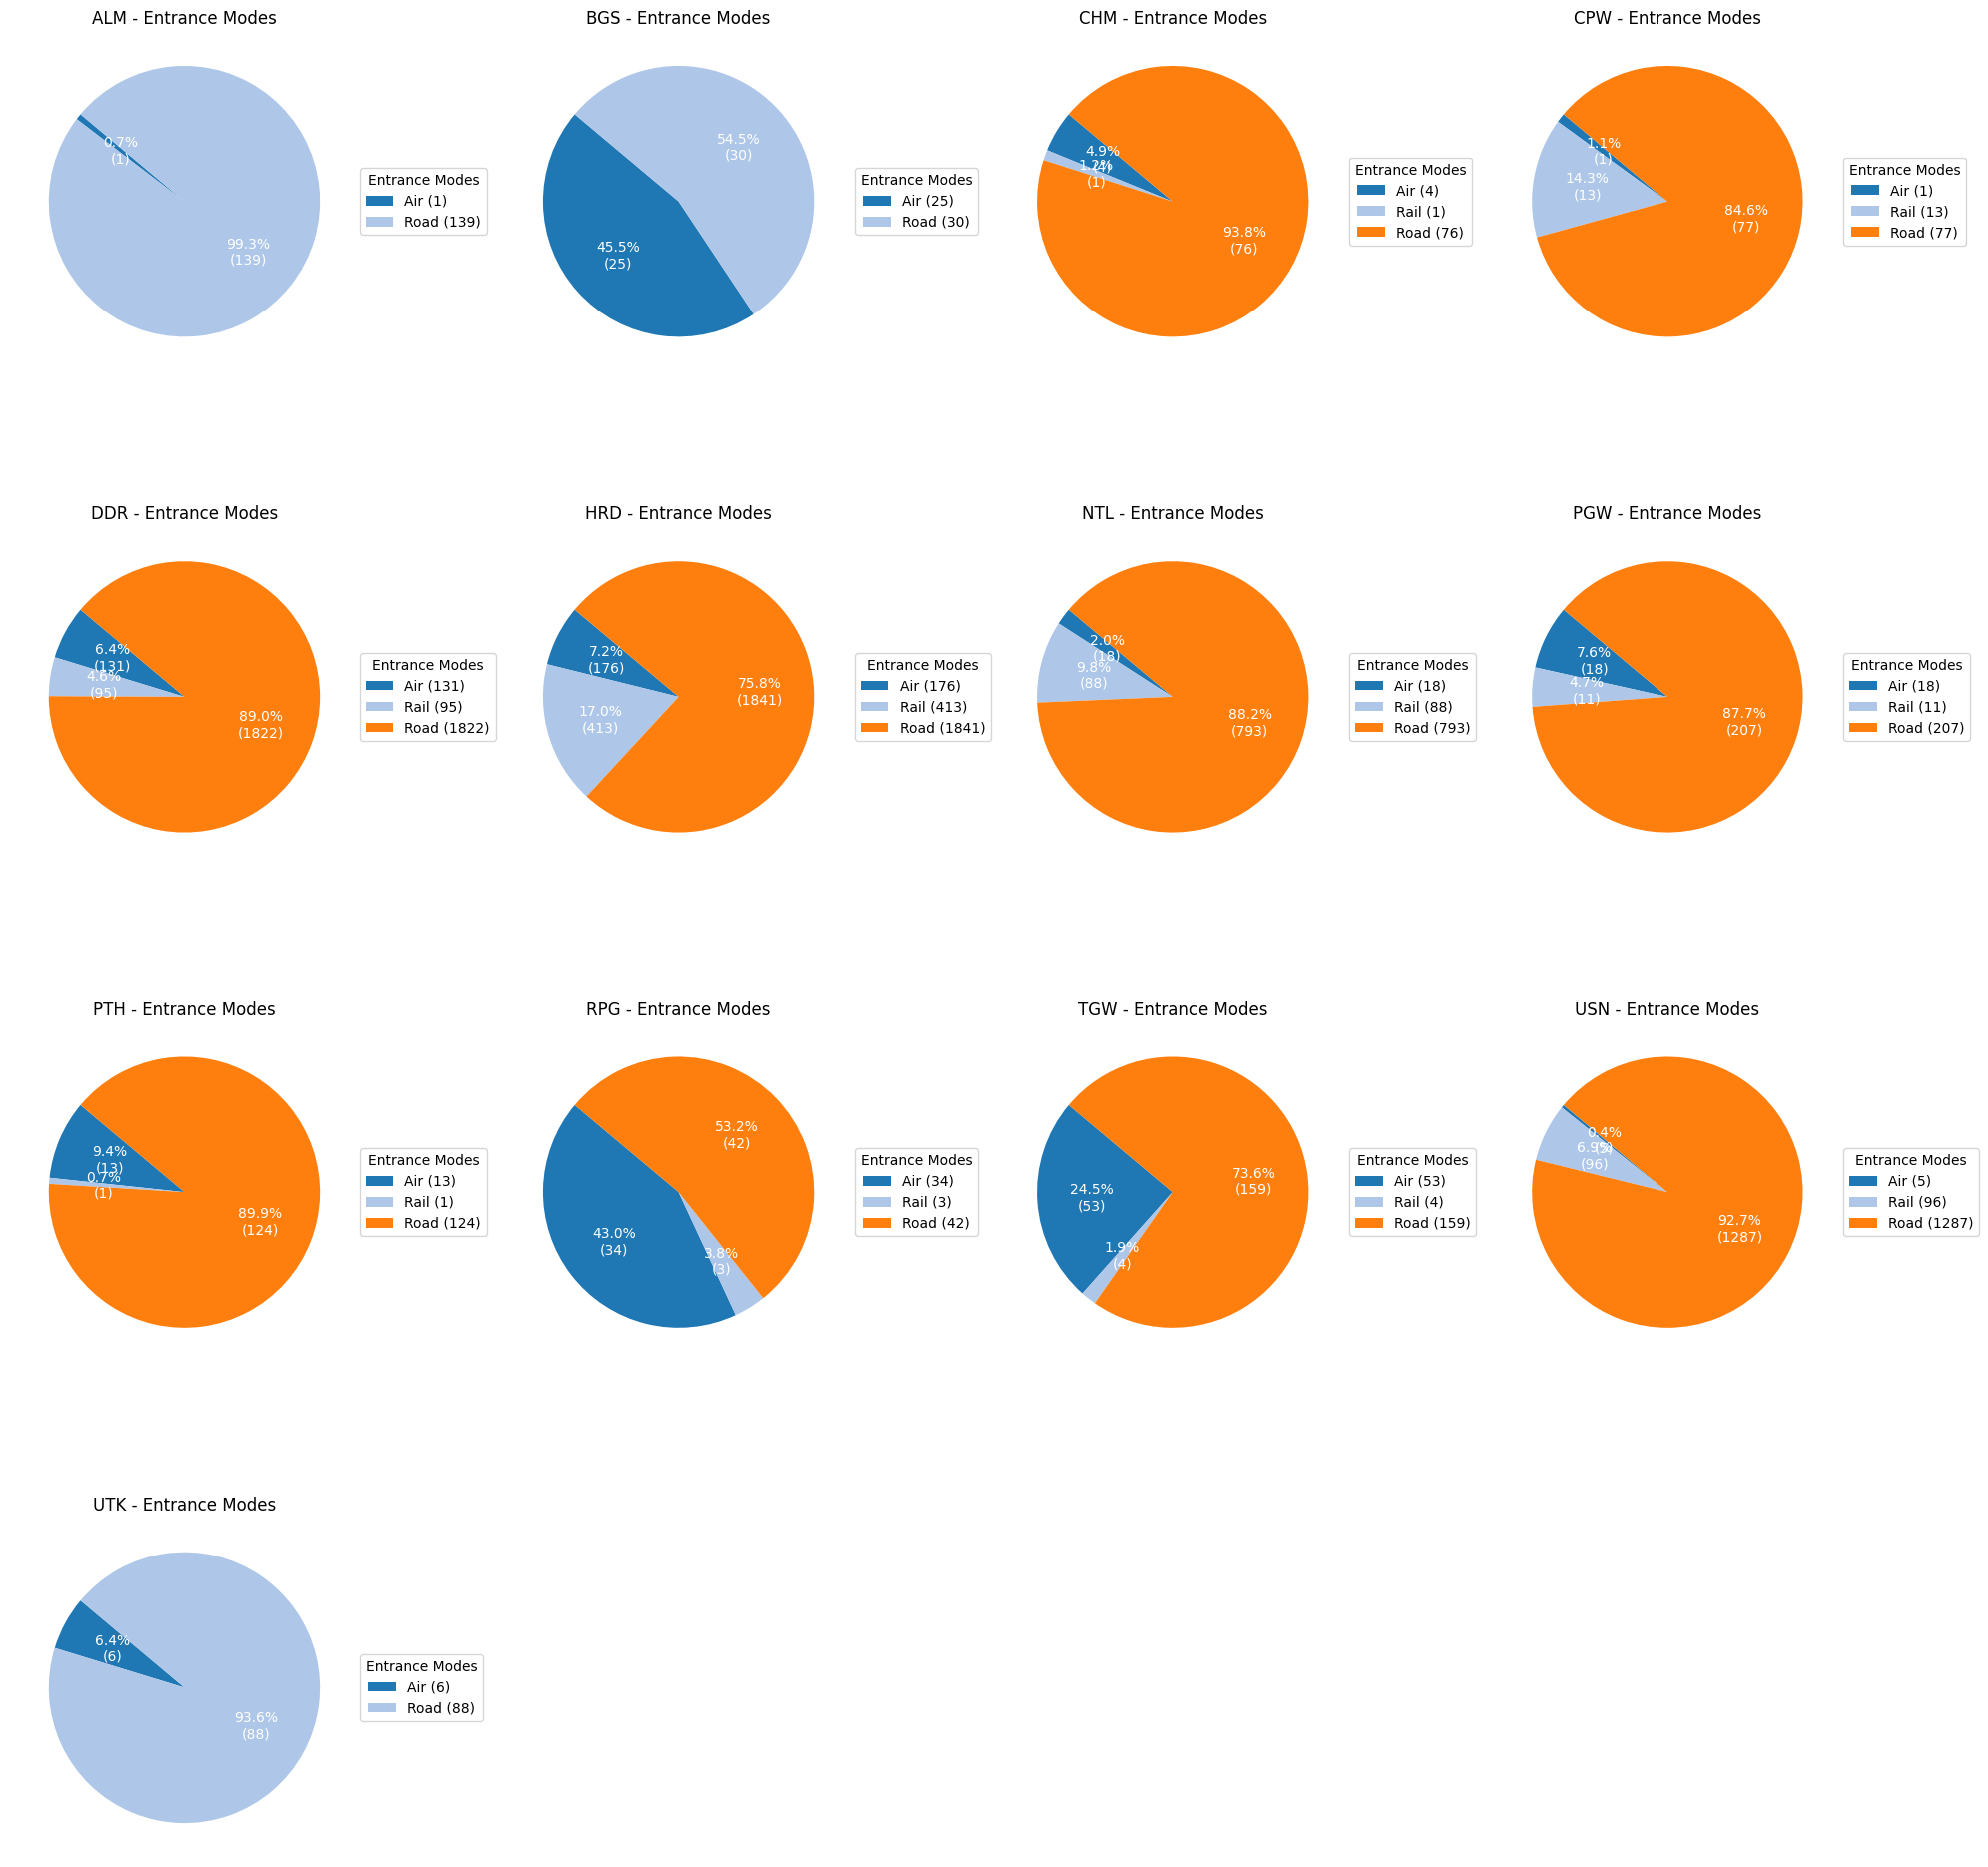

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

# Example DataFrame setup
# df_new = pd.read_csv('your_dataframe.csv')  # Uncomment and replace with your actual DataFrame

# Step 1: Group by 'district' and 'entrance_mode' and calculate counts
entries_by_district_mode = df_new.groupby(['district', 'entrance_mode']).size().reset_index(name='count')

# Unique districts for iteration
districts = entries_by_district_mode['district'].unique()

# Determine the number of subplots needed based on the number of districts
num_districts = len(districts)
cols = 4  # You can adjust this based on your preference
rows = ceil(num_districts / cols)

# Step 2: Create Pie Charts with counts and percentages
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten axes array to easily iterate

# Define a color palette
color_palette = plt.get_cmap('tab20').colors  # 'tab20' has more distinct colors

for i, district in enumerate(districts):
    ax = axes[i]
    
    # Filter data for current district
    data = entries_by_district_mode[entries_by_district_mode['district'] == district]
    
    # Prepare data for pie chart
    labels = data['entrance_mode']
    sizes = data['count']
    colors = color_palette[:len(labels)]  # Assign colors based on the number of entrance modes
    
    # Define a custom autopct function to show percentage and count
    def autopct_format(pct, counts):
        total = sum(counts)
        count = int(round(pct * total / 100))
        return f'{pct:.1f}%\n({count})'
    
    # Create pie chart in respective subplot
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes),
        startangle=140, 
        colors=colors,
        textprops=dict(color="w")  # Adjust text color for better visibility
    )
    
    # Add a legend with entrance modes and counts
    ax.legend(wedges, [f"{label} ({count})" for label, count in zip(labels, sizes)],
              title="Entrance Modes",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(f'{district} - Entrance Modes')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap and ensure readability
plt.tight_layout()

# Display the plot
plt.show()


In [169]:
df_new['district'].value_counts()

district
Haridwar             909
Dehradun             674
Udham Singh Nagar    477
Nainital             291
Tehri Garhwal         82
Pauri Garhwal         80
Almora                43
Pithoragarh           34
Uttarkashi            33
Champawat             29
Chamoli               28
Rudraprayag           22
Bageshwar             12
Name: count, dtype: int64

In [170]:
df_activites[df_activites['Activity_type']=='Tourist Attraction']['place_name'].unique()

array(['Sehetrdhara', 'Shiva Statue',
       'Shree nanda devi rajjat wall murals', 'चिड़ियाघर देहरादून',
       'Statue of Buddha', 'I Love Haldwani Sign', 'Aeroplane',
       'Eco Cave Garden', 'DOLCE VITA COMPLEX', 'Fighter Jet',
       'Balaji dham ( Hanuman Mandir )', 'IVRI Round About',
       'Gun Hill Ropeway', "Robber's Cave (Guchhupani)", 'Blue Shiva',
       'Gallery of Sikh Martyrs', 'Viewpoint', 'Char Dukan',
       'IVRI Main Gate', 'Company Gardens', 'Arundhati Guha Cave'],
      dtype=object)

In [173]:
df_merged.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Char dham\dataframe_all_activity_type_and_mode_26082024_13922 IDs.csv', index=False)